In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
from __future__ import absolute_import, print_function,division, unicode_literals

import os.path
import glob
import shutil

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras

import numpy as np
import matplotlib.pyplot as plt
import pathlib

print ('successful')

successful


In [3]:
# Definisikan path kaggle json
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/dataset_tugas2"

In [4]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/My Drive/dataset_tugas2

/content/drive/My Drive/dataset_tugas2


In [7]:
!kaggle datasets download -d vbookshelf/rice-leaf-diseases

 68% 25.0M/36.7M [00:00<00:00, 25.4MB/s]
100% 36.7M/36.7M [00:00<00:00, 57.8MB/s]


In [9]:
!unzip \*.zip &> /dev/null && rm *.zip

In [10]:
!ls

kaggle.json  rice_leaf_diseases


In [11]:
os.makedirs('/content/drive/My Drive/dataset_tugas2/Dataset')

In [12]:
!pip install split-folders

In [13]:
import splitfolders

base_dir = '/content/drive/MyDrive/dataset_tugas2/rice_leaf_diseases'
data_dir = '/content/drive/My Drive/dataset_tugas2/Dataset'

splitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8, .19, .01),group_prefix=None)

Copying files: 120 files [00:01, 62.63 files/s]


In [17]:
BATCH_SIZE = 8
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [16]:
data_dir ="/content/drive/MyDrive/dataset_tugas2/rice_leaf_diseases"
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['Leaf Blight','Brown Spot','Leaf Smut'])

print('Class Names: ', CLASS_NAMES)

Class Names:  ['Leaf Blight' 'Brown Spot' 'Leaf Smut']


In [18]:
# TULIS KODE ANDA DISINI
datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_path = '/content/drive/MyDrive/dataset_tugas2/Dataset/train'
test_path = '/content/drive/MyDrive/dataset_tugas2/Dataset/test'
val_path = '/content/drive/MyDrive/dataset_tugas2/Dataset/val'

In [20]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

image_test_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

test_data_gen = image_test_gen.flow_from_directory(test_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(val_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 96 images belonging to 3 classes.
Found 3 images belonging to 3 classes.
Found 21 images belonging to 3 classes.


In [21]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

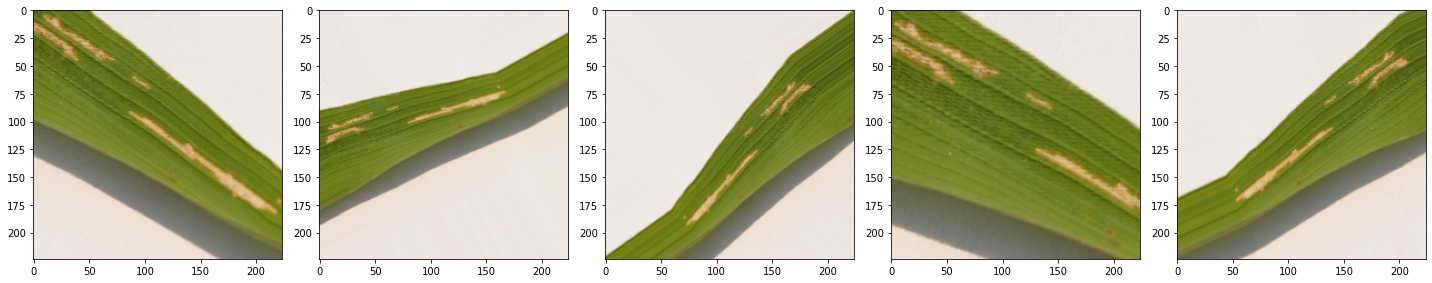

In [22]:
# Plot a few training images
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

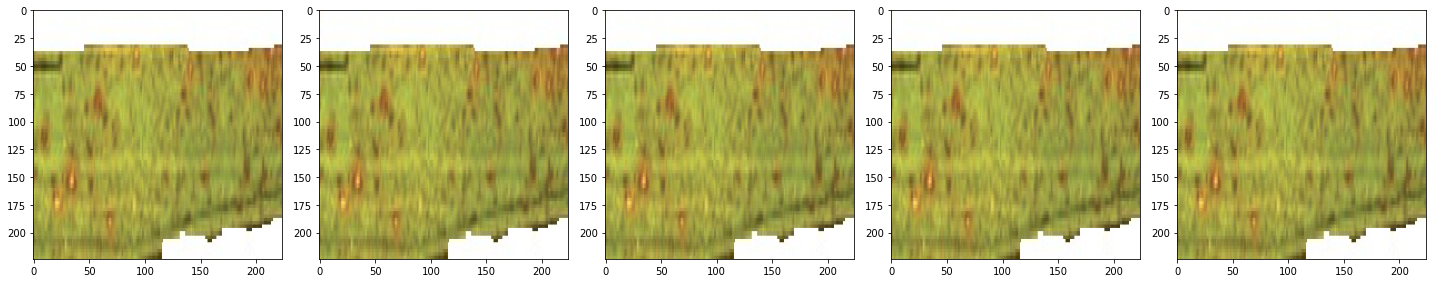

In [23]:
# plot a few val images
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

In [24]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 64)      

In [25]:
H = model.fit(train_data_gen, epochs=100, validation_data=val_data_gen)

Epoch 1/100
12/12 [==============================] - 57s 2s/step - loss: 1.3027 - accuracy: 0.4375 - val_loss: 1.1116 - val_accuracy: 0.3810
Epoch 2/100
12/12 [==============================] - 5s 422ms/step - loss: 1.0410 - accuracy: 0.4479 - val_loss: 1.1887 - val_accuracy: 0.2857
Epoch 3/100
12/12 [==============================] - 5s 422ms/step - loss: 1.0231 - accuracy: 0.4896 - val_loss: 1.1185 - val_accuracy: 0.4286
Epoch 4/100
12/12 [==============================] - 5s 407ms/step - loss: 1.0378 - accuracy: 0.4688 - val_loss: 1.1347 - val_accuracy: 0.4286
Epoch 5/100
12/12 [==============================] - 5s 419ms/step - loss: 0.9421 - accuracy: 0.4792 - val_loss: 1.2064 - val_accuracy: 0.3810
Epoch 6/100
12/12 [==============================] - 5s 418ms/step - loss: 0.8590 - accuracy: 0.5833 - val_loss: 1.3732 - val_accuracy: 0.4286
Epoch 7/100
12/12 [==============================] - 5s 415ms/step - loss: 0.8930 - accuracy: 0.5938 - val_loss: 1.1654 - val_accuracy: 0.4762
E

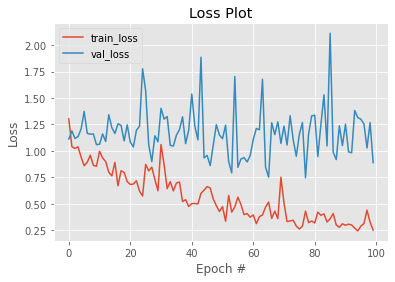

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()